### Problem Statement

You are a data scientist / AI engineer working on an unsupervised learning problem. You have been provided with a dataset named **`"wine_clustering_data.csv"`**, which includes information about various attributes from a chemical analysis of wines. The dataset comprises the following columns:

- `alcohol:` Alcohol content in the wine.
- `malic_acid:` Malic acid content in the wine.
- `ash:` Ash content in the wine.
- `ash_alcanity:` Alcalinity of the ash in the wine.
- `magnesium:` Magnesium content in the wine.
- `total_phenols:` Total phenolic content in the wine.
- `flavanoids:` Flavanoid content in the wine.
- `nonflavanoid_phenols:` Nonflavanoid phenolic content in the wine.
- proanthocyanins:` Proanthocyanin content in the wine.
- `color_intensity:` Color intensity of the wine.
- `hue:` Hue of the wine.
- `od280:` OD280/OD315 ratio of the wine.
- `proline:` Proline content in the wine.

Your task is to use this dataset to apply `DBSCAN clustering` to identify natural groupings based on these chemical properties. You will also visualize the clusters.

**Dataset credits:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine)

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


### Task 1: Data Preparation and Exploration

1. Import the data from the `"wine_clustering_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use `describe()` to get the summary statistics for each feature.
5. Visualize the distribution of each feature using histograms.

In [5]:
# Step 1: Import the dataset
df=pd.read_csv("wine_clustering_data.csv")

# Step 2: Display the number of rows and columns in the dataset
df.shape

# Step 3: Display the first few rows of the dataset to get an overview
df.sample(5)

alcohol  malic_acid   ash  ash_alcanity  magnesium  total_phenols  \
93     12.29        2.83  2.22          18.0         88           2.45   
150    13.50        3.12  2.62          24.0        123           1.40   
163    12.96        3.45  2.35          18.5        106           1.39   
31     13.58        1.66  2.36          19.1        106           2.86   
142    13.52        3.17  2.72          23.5         97           1.55   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
93         2.25                  0.25             1.99             2.15  1.15   
150        1.57                  0.22             1.25             8.60  0.59   
163        0.70                  0.40             0.94             5.28  0.68   
31         3.19                  0.22             1.95             6.90  1.09   
142        0.52                  0.50             0.55             4.35  0.89   

     od280  proline  
93    3.30      290  
150   1.30      500  
163   1.75      675  
31    2.88     1515  
142   2.06      520

In [6]:
# Step 4: Use describe() to get the summary statistics for each feature
df.describe()

alcohol  malic_acid         ash  ash_alcanity   magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue       od280      proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

<Axes: ylabel='Count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


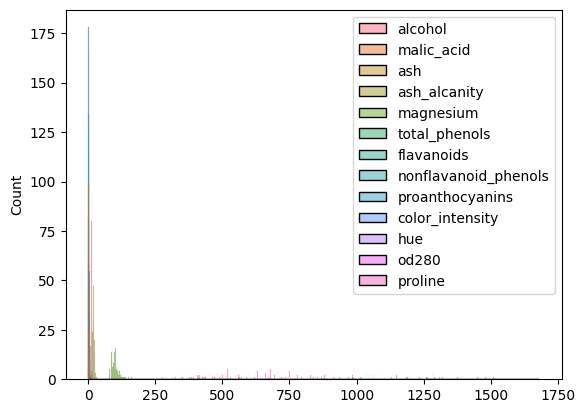

In [8]:
# Step 5: Visualize the distribution of each feature using histograms
sns.histplot(df)

### Task 2: Standardization

1. Use `StandardScaler` to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.

In [10]:
Scalar=StandardScaler()
df_scaled=Scalar.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

# show few rows
df_scaled.sample(5)

alcohol  malic_acid       ash  ash_alcanity  magnesium  total_phenols  \
161  0.851569    0.829128  0.634140      0.151661   0.509638      -0.745264   
9    1.061565   -0.885409 -0.352802     -1.049479  -0.122282       1.097417   
64  -1.026033   -0.795642  0.597587     -0.148624   0.298998      -0.649124   
144 -0.927212    1.385679 -0.608676     -0.298767   0.860705      -1.466313   
104 -0.606043   -0.544297 -1.412851      0.301803  -1.035055      -0.152402   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
161   -1.475098              1.113154        -1.385721         0.355534   
9      1.125176             -1.143031         0.453967         0.935177   
64    -0.280377              0.710264        -0.982742        -0.911896   
144   -1.254225             -0.578985        -0.790013         1.363422   
104   -0.109703             -0.337251        -0.194304        -0.916222   

          hue     od280   proline  
161  0.011190 -1.118210 -0.213021  
9    0.230557  1.325316  0.949319  
64   2.160986 -0.539109 -1.247982  
144 -1.348885 -0.863971  0.344265  
104  0.362177  1.353565 -0.238497

### Task 3: Initial DBSCAN Clustering

1. Apply DBSCAN clustering to the standardized data with `eps=2 and min_samples=2`.
2. Add the cluster labels to the original DataFrame.
3. Visualize the clusters using a scatter plot for a pair of features (e.g., alcohol and malic_acid).

In [11]:
# Step 1: Apply DBSCAN clustering to the standardized data with eps=2 and min_samples=2
model=DBSCAN(eps=2,min_samples=2)
model.fit(df_scaled)


In [13]:

# Step 2: Add the cluster labels to the original DataFrame
df_scaled["cluster_label"]=model.labels_


#show few rows
df_scaled.sample(5)

alcohol  malic_acid       ash  ash_alcanity  magnesium  total_phenols  \
138  0.604516    1.125357 -0.645229      0.001518  -0.824415      -1.081754   
149  0.098058    1.403632 -0.023821      0.602088   0.930918      -1.418243   
171 -0.284874    0.048161 -0.316249      0.001518  -0.964842      -1.450290   
11   1.382733   -0.768712 -0.170035     -0.809251  -0.332922      -0.152402   
126 -0.704864   -0.723829 -0.279695      0.602088  -0.964842       0.712858   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
138   -1.555415              1.757779        -1.245555         0.277671   
149   -0.641805             -0.176095        -0.790013         1.878180   
171   -1.525296              0.951998        -1.666055         2.094465   
11     0.402320             -0.820719        -0.036617        -0.025128   
126    1.125176              0.226796         0.313800        -0.483652   

          hue     od280   proline  cluster_label  
138 -0.646911 -1.118210 -0.531471              5  
149 -1.699872 -1.810307 -0.627005              7  
171 -1.699872 -1.386574 -0.881765              5  
11   0.932531  0.294232  1.697675              0  
126 -1.173391  0.322481 -1.257535              0

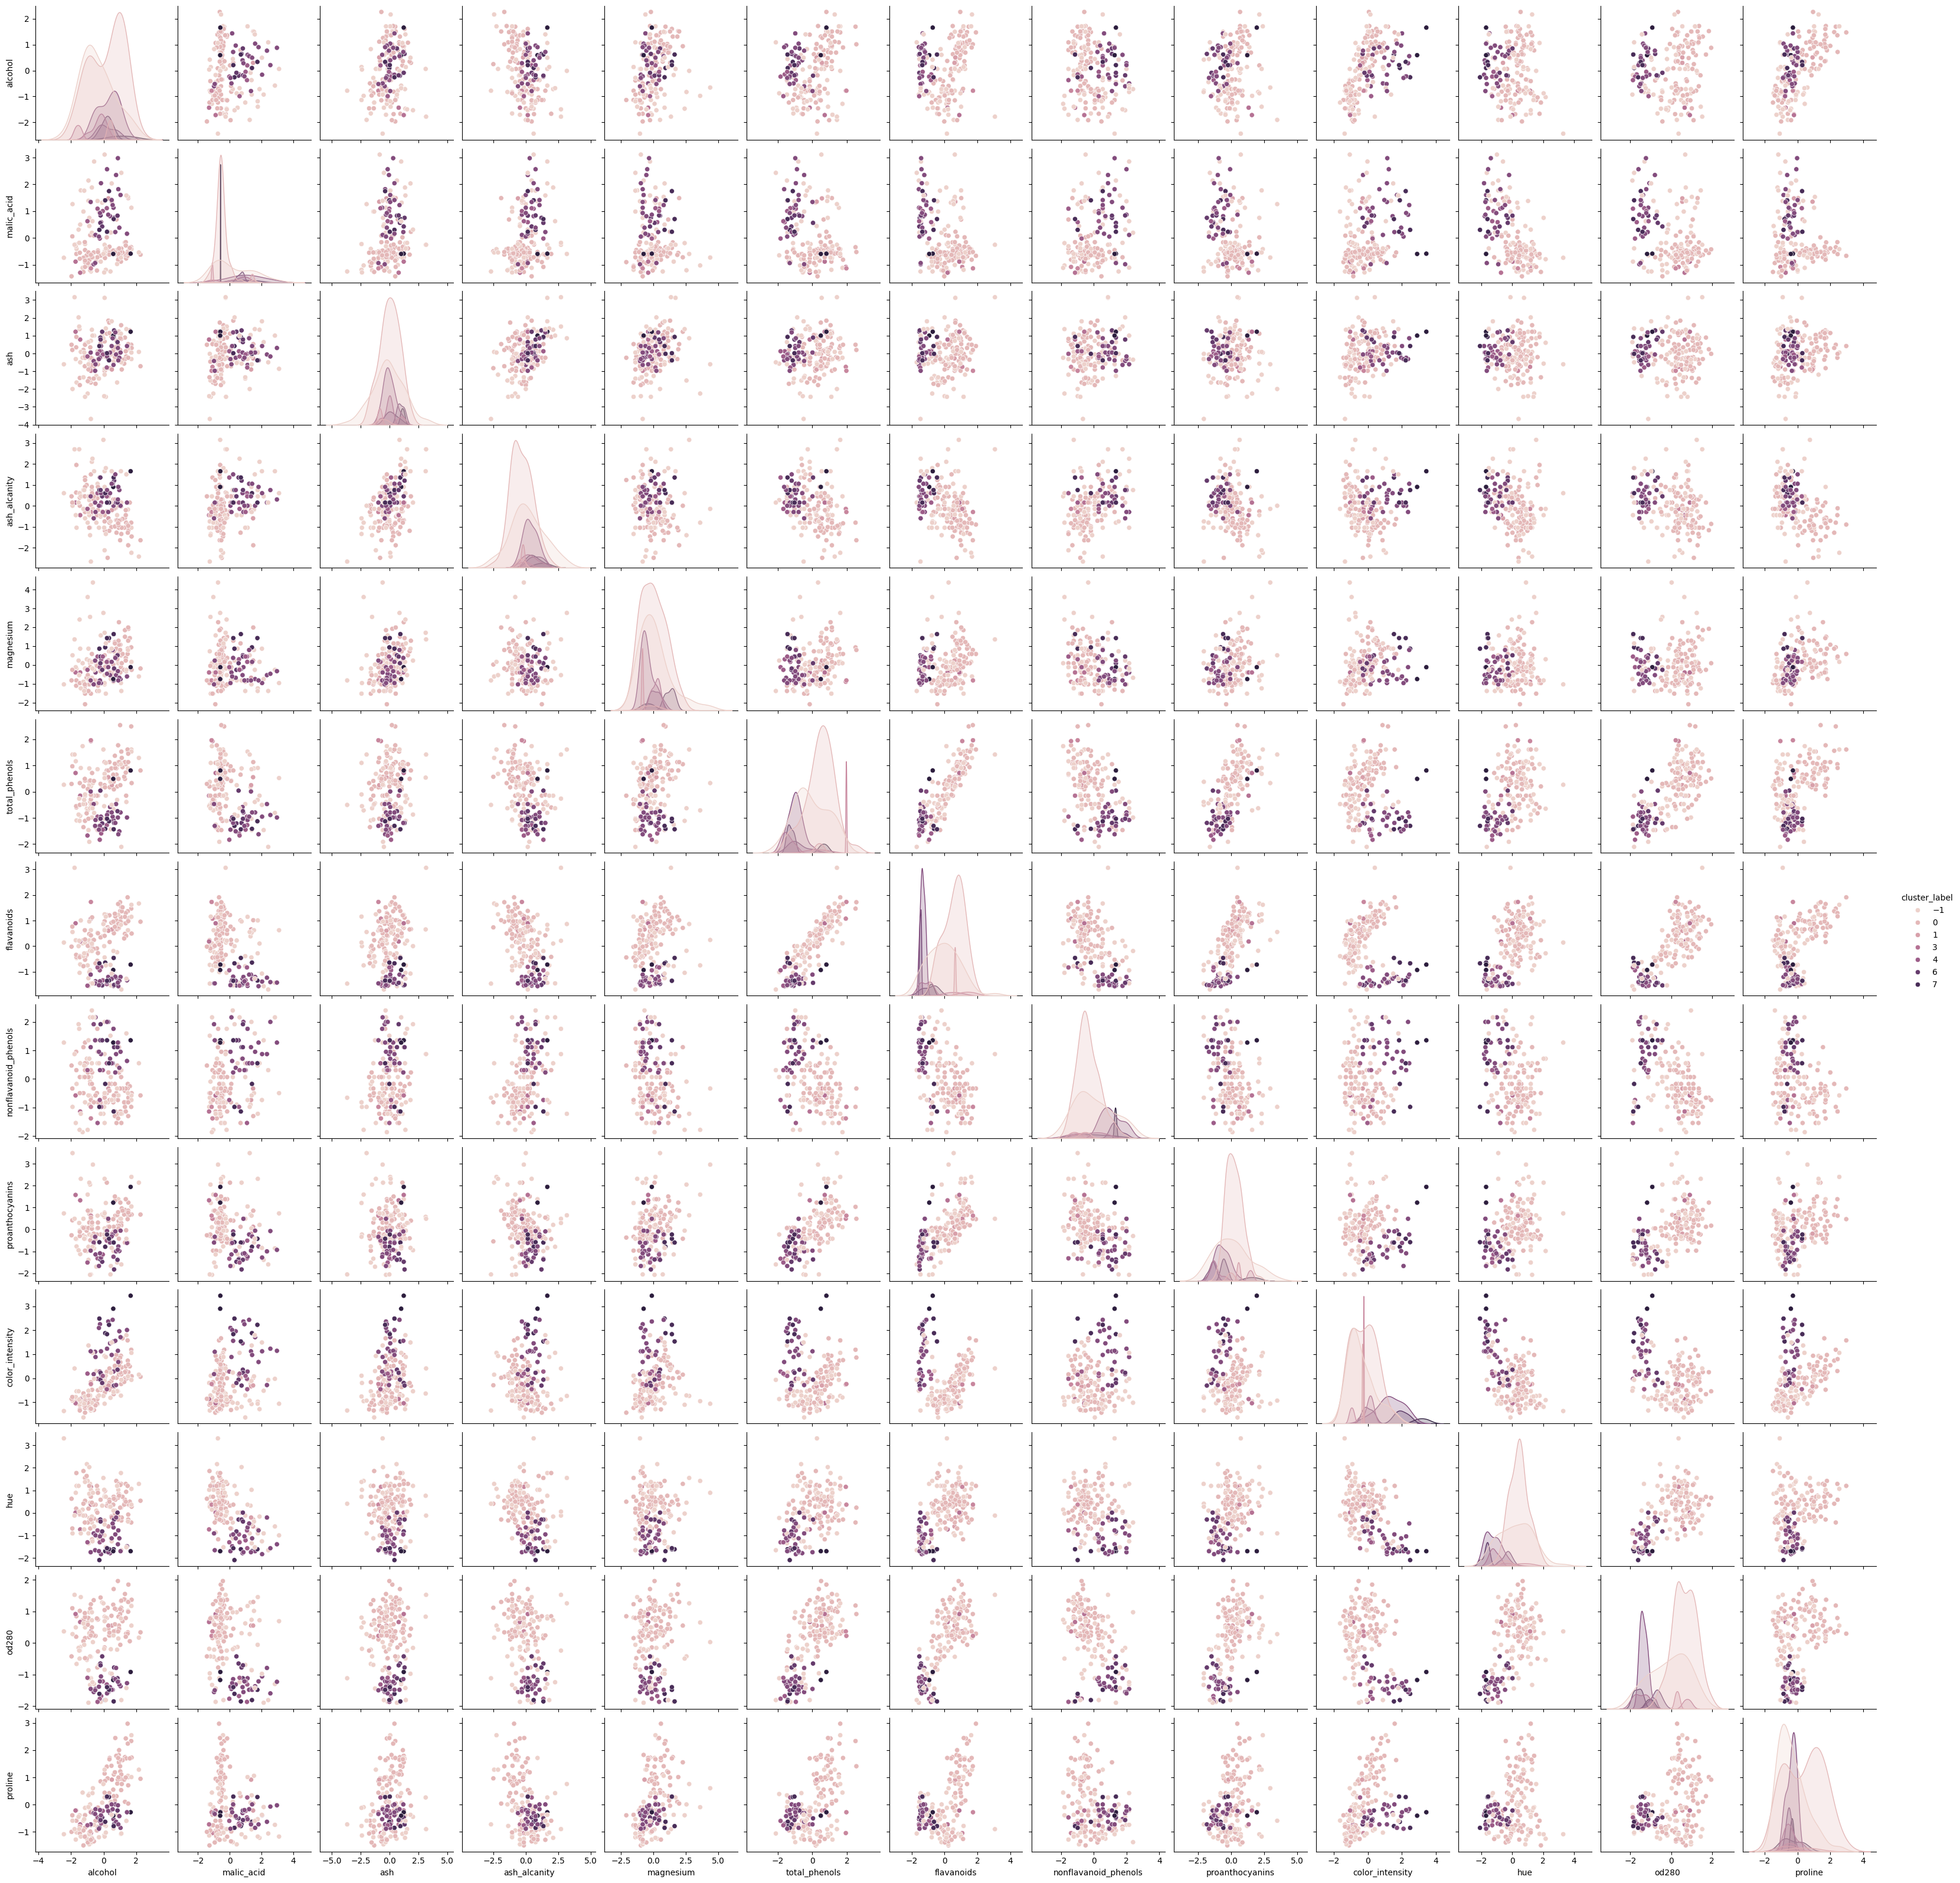

In [14]:

# Step 3: Visualize the clusters using a scatter plot for a pair of features
sns.pairplot(df_scaled,hue="cluster_label")

### Task 4: Parameter Tuning

1. Experiment with different values of eps (2, 3.5, 4) and min_samples (2, 4, 6) to see how the clustering results change.
2. Visualize the clusters using scatter plots with different parameter settings for a pair of features (e.g., alcohol and malic_acid).

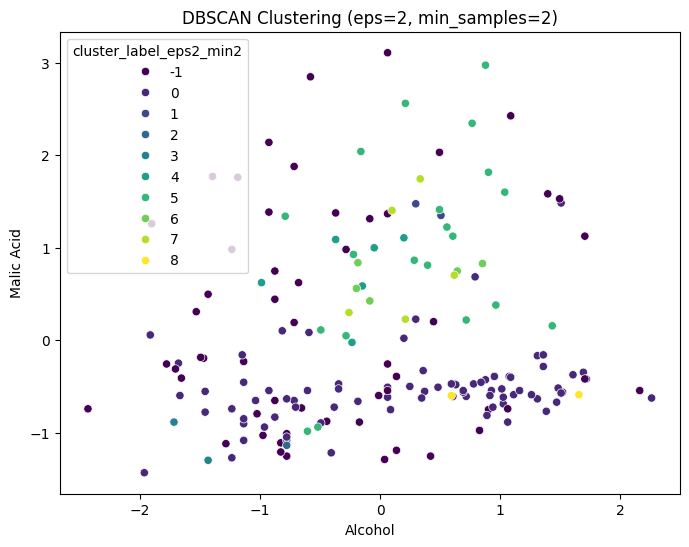

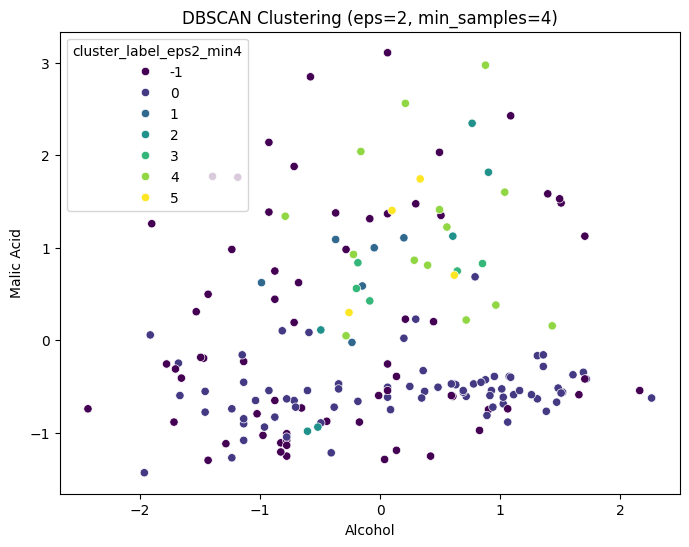

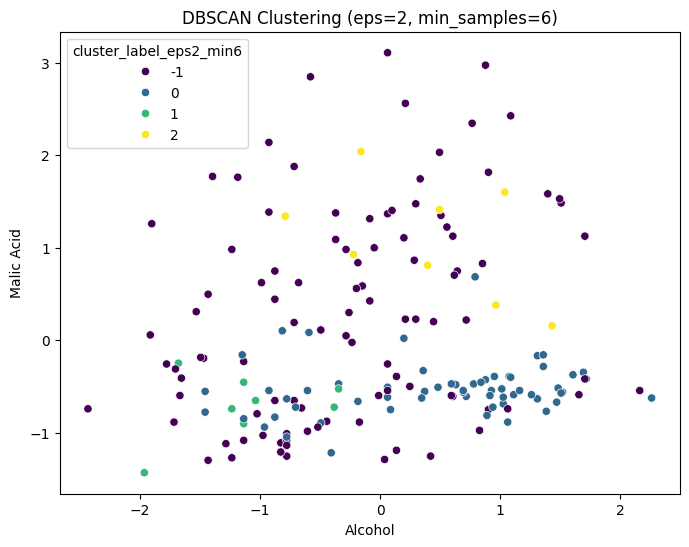

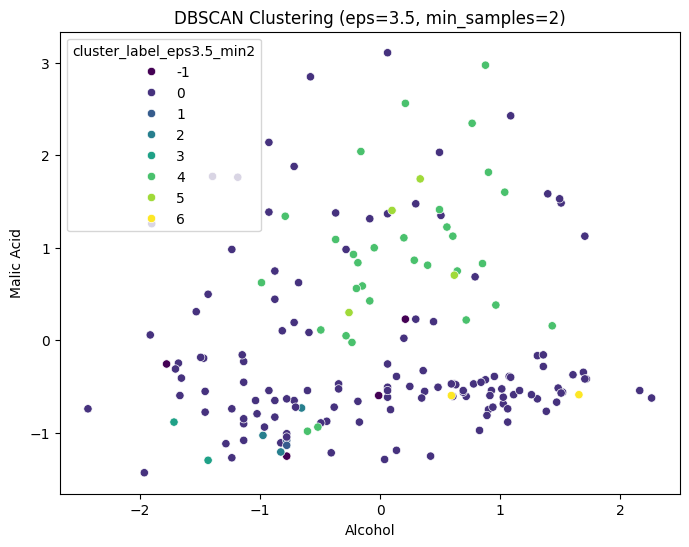

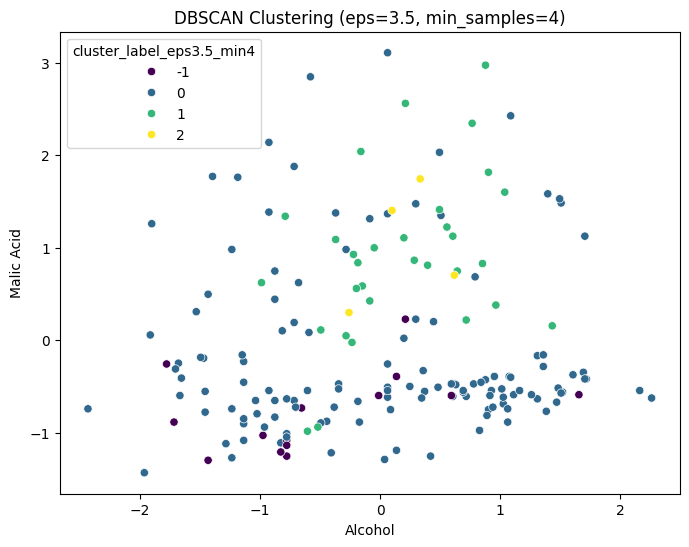

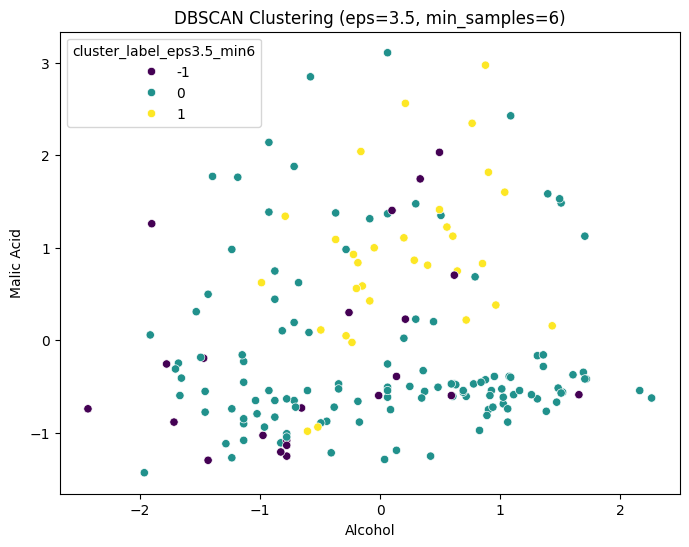

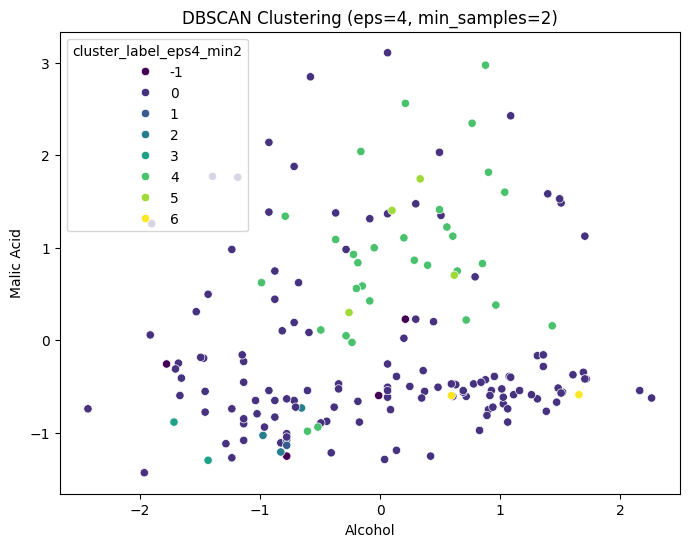

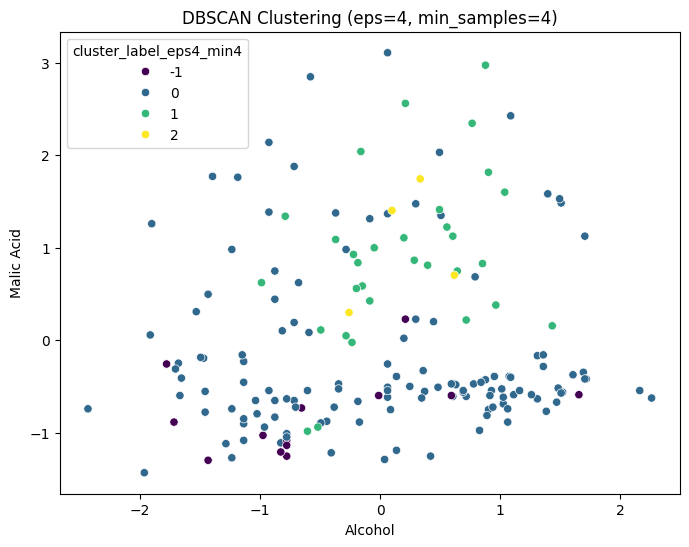

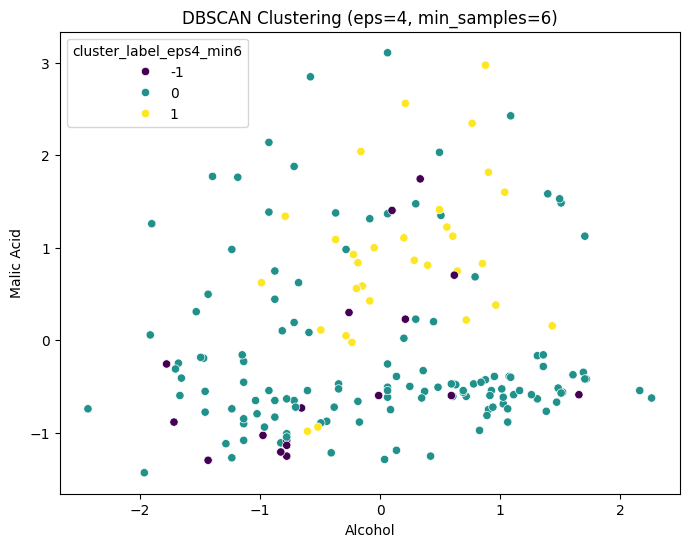

In [17]:
# Task 4: Parameter Tuning

# Experiment with different values of `eps` (2, 3.5, 4) and `min_samples` (2, 4, 6)
for eps in [2, 3.5, 4]:
    for min_samples in [2, 4, 6]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(df_scaled)

        # Add the cluster labels to the original DataFrame for visualization
        df_scaled[f"cluster_label_eps{eps}_min{min_samples}"] = model.labels_

        # Visualize the clusters using a scatter plot for a pair of features
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_scaled['alcohol'], y=df_scaled['malic_acid'], hue=df_scaled[f"cluster_label_eps{eps}_min{min_samples}"], palette='viridis', legend='full')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Alcohol')
        plt.ylabel('Malic Acid')
        plt.show()